# Homework

## 1.1 Regression
## 1.1.1 regression model for California housing dataset with keras functional API

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn import model_selection
from keras import layers, models

2023-04-08 23:43:52.782649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
housing = fetch_california_housing()
x_data = housing.data
y_data = housing.target

print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_train_selected = x_train_scaled[:,0:2]
x_test_selected = x_test_scaled[:,0:2]

In [5]:
from keras import layers, models

# input_shape = (x_train_scaled.shape[1],)
input_shape = (x_train_selected.shape[1],)

In [6]:
input = layers.Input(shape=input_shape)
print(input_shape)

hidden_1st = layers.Dense(64, activation='relu')(input)
hidden_2nd = layers.Dense(32, activation = 'relu')(hidden_1st)
output = layers.Dense(1, activation='linear')(hidden_2nd)

my_regr_model = models.Model(input, output)
my_regr_model.compile(loss='mean_squared_error')
my_regr_model.summary()

(2,)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


2023-04-08 23:43:54.620201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
history = my_regr_model.fit(x_train_selected, y_train, validation_data = [x_test_selected, y_test], batch_size = 32, epochs = 50)

Epoch 1/50
516/516 [==============================] - 0s 595us/step - loss: 0.9091 - val_loss: 0.6647
Epoch 2/50
516/516 [==============================] - 0s 460us/step - loss: 0.6228 - val_loss: 0.6664
Epoch 3/50
516/516 [==============================] - 0s 457us/step - loss: 0.6140 - val_loss: 0.6498
Epoch 4/50
516/516 [==============================] - 0s 473us/step - loss: 0.6112 - val_loss: 0.6435
Epoch 5/50
516/516 [==============================] - 0s 461us/step - loss: 0.6073 - val_loss: 0.6364
Epoch 6/50
516/516 [==============================] - 0s 464us/step - loss: 0.6054 - val_loss: 0.6425
Epoch 7/50
516/516 [==============================] - 0s 462us/step - loss: 0.6048 - val_loss: 0.6392
Epoch 8/50
516/516 [==============================] - 0s 464us/step - loss: 0.6025 - val_loss: 0.6368
Epoch 9/50
516/516 [==============================] - 0s 454us/step - loss: 0.6022 - val_loss: 0.6390
Epoch 10/50
516/516 [==============================] - 0s 456us/step - loss: 0.603

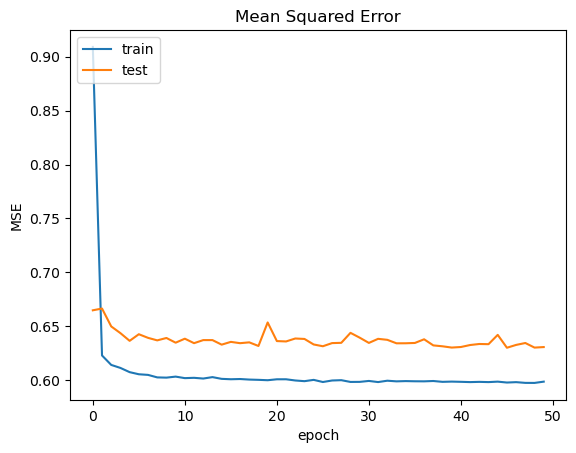

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Homework

## 1.2 Classification
## 1.2.1classification models for MNIST dataset with keras sequential API

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/Users/han9rykim/opt/anaconda3/envs/DLclass/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
x_data = mnist.data
y_data = mnist.target

In [11]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [13]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [14]:
from keras import layers, models

input_shape = (x_train_scaled.shape[1], )

In [15]:
print(input_shape)

(784,)


In [16]:
clf_model_seq = models.Sequential()
clf_model_seq.add(layers.Dense(units=64, activation='relu', input_shape=input_shape))
clf_model_seq.add(layers.Dense(units=32, activation='relu'))
clf_model_seq.add(layers.Dense(units=10, activation='softmax'))
                  
clf_model_seq.compile(loss='categorical_crossentropy', metrics=['accuracy'])
clf_model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = clf_model_seq.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], batch_size=32, epochs=50)

Epoch 1/50
1750/1750 [==============================] - 1s 720us/step - loss: 0.3032 - accuracy: 0.9119 - val_loss: 0.1849 - val_accuracy: 0.9463
Epoch 2/50
1750/1750 [==============================] - 1s 671us/step - loss: 0.1443 - accuracy: 0.9572 - val_loss: 0.1355 - val_accuracy: 0.9604
Epoch 3/50
1750/1750 [==============================] - 1s 698us/step - loss: 0.1095 - accuracy: 0.9674 - val_loss: 0.1191 - val_accuracy: 0.9689
Epoch 4/50
1750/1750 [==============================] - 1s 662us/step - loss: 0.0916 - accuracy: 0.9733 - val_loss: 0.1217 - val_accuracy: 0.9663
Epoch 5/50
1750/1750 [==============================] - 1s 660us/step - loss: 0.0778 - accuracy: 0.9769 - val_loss: 0.1071 - val_accuracy: 0.9706
Epoch 6/50
1750/1750 [==============================] - 1s 677us/step - loss: 0.0699 - accuracy: 0.9803 - val_loss: 0.1239 - val_accuracy: 0.9696
Epoch 7/50
1750/1750 [==============================] - 1s 700us/step - loss: 0.0620 - accuracy: 0.9823 - val_loss: 0.1179 -

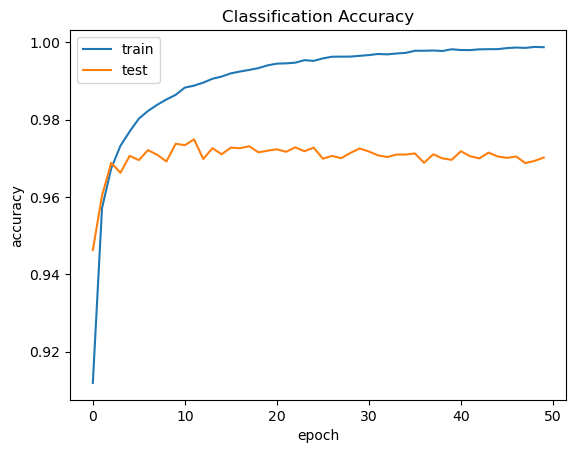

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

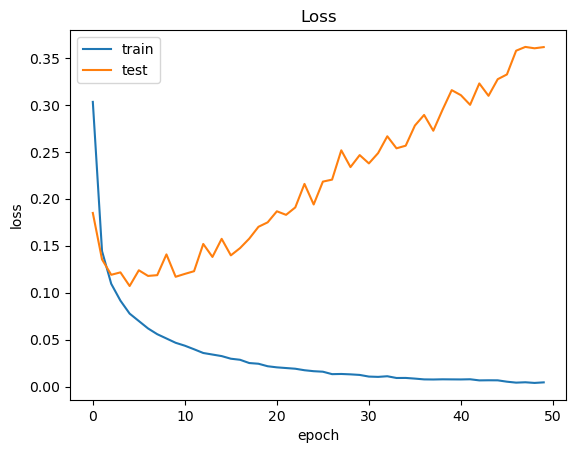

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

## 1.2.2. classification models for MNIST dataset with keras functional API

In [23]:
input = layers.Input(shape=input_shape)
print(input_shape)

hidden_1st = layers.Dense(64, activation='relu')(input)
hidden_2nd = layers.Dense(32, activation = 'relu')(hidden_1st)
output = layers.Dense(10, activation='softmax')(hidden_2nd)

my_clf_model = models.Model(input, output)
my_clf_model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
my_clf_model.summary()

(784,)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = my_clf_model.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], batch_size=32, epochs=50)

Epoch 1/50
1750/1750 [==============================] - 2s 774us/step - loss: 0.3157 - accuracy: 0.9082 - val_loss: 0.1951 - val_accuracy: 0.9444
Epoch 2/50
1750/1750 [==============================] - 1s 698us/step - loss: 0.1521 - accuracy: 0.9545 - val_loss: 0.1461 - val_accuracy: 0.9567
Epoch 3/50
1750/1750 [==============================] - 1s 719us/step - loss: 0.1143 - accuracy: 0.9657 - val_loss: 0.1250 - val_accuracy: 0.9639
Epoch 4/50
1750/1750 [==============================] - 1s 715us/step - loss: 0.0937 - accuracy: 0.9718 - val_loss: 0.1211 - val_accuracy: 0.9657
Epoch 5/50
1750/1750 [==============================] - 1s 722us/step - loss: 0.0813 - accuracy: 0.9761 - val_loss: 0.1131 - val_accuracy: 0.9700
Epoch 6/50
1750/1750 [==============================] - 1s 724us/step - loss: 0.0705 - accuracy: 0.9794 - val_loss: 0.1122 - val_accuracy: 0.9725
Epoch 7/50
1750/1750 [==============================] - 1s 732us/step - loss: 0.0634 - accuracy: 0.9815 - val_loss: 0.1204 -

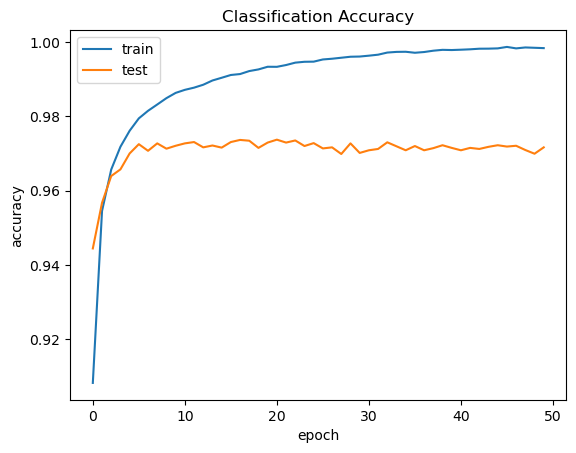

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

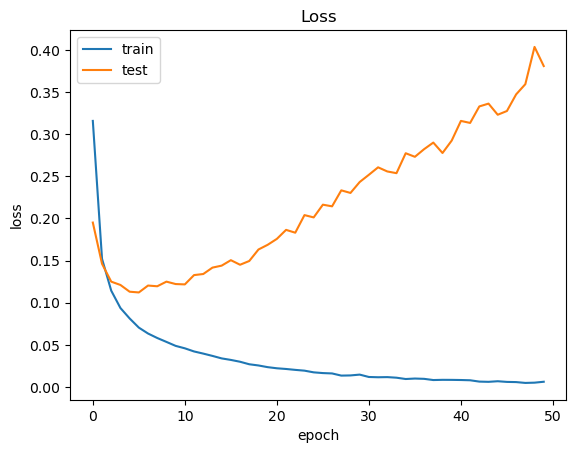

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()